In [ ]:
# # 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf


In [ ]:
# 구글 코랩에서 한글 폰트를 설치합니다.
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치된 폰트를 확인합니다.
!fc-list :lang=ko

# 런타임 다시 시작

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGo

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글이 깨지지 않도록 하기 위해서 minus 표시를 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/big_data_set1_f.csv',encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/big_data_set2_f.csv',encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/big_data_set3_f.csv',encoding='cp949')

# 1. 기본 전처리

In [ ]:
df_12 = pd.merge(
    df1,
    df2,
    on="ENCODED_MCT",  # df1에는 TA_YM이 없으므로 ENCODED_MCT만 기준으로 우선 병합
    how="left"
)

# 2) df_12와 df3 병합 (ENCODED_MCT와 TA_YM 기준)
df = pd.merge(
    df_12,
    df3,
    on=["ENCODED_MCT", "TA_YM"],  # df3에는 TA_YM이 있으므로 함께 매칭
    how="left"
)

# 결과 확인
print(df.shape)
print(df.head())


(86590, 38)
  ENCODED_MCT  MCT_BSE_AR MCT_NM MCT_BRD_NUM MCT_SIGUNGU_NM HPSN_MCT_ZCD_NM  \
0  16184E93D9  서울 성동구 마장동   성우**         NaN         서울 성동구             축산물   
1  16184E93D9  서울 성동구 마장동   성우**         NaN         서울 성동구             축산물   
2  16184E93D9  서울 성동구 마장동   성우**         NaN         서울 성동구             축산물   
3  16184E93D9  서울 성동구 마장동   성우**         NaN         서울 성동구             축산물   
4  16184E93D9  서울 성동구 마장동   성우**         NaN         서울 성동구             축산물   

  HPSN_MCT_BZN_CD_NM     ARE_D  MCT_ME_D   TA_YM  ... M12_FME_1020_RAT  \
0                마장동  20130320       NaN  202405  ...           1.9520   
1                마장동  20130320       NaN  202304  ...           2.6136   
2                마장동  20130320       NaN  202308  ...           2.2940   
3                마장동  20130320       NaN  202402  ...           2.0944   
4                마장동  20130320       NaN  202406  ...           2.1655   

  M12_FME_30_RAT M12_FME_40_RAT M12_FME_50_RAT M12_FME_60_RAT  \
0  

In [ ]:
# 결측치 처리
cols_to_replace = [
    "DLV_SAA_RAT",
    "M12_SME_BZN_ME_MCT_RAT",
    "M12_MAL_1020_RAT",
    "M12_MAL_30_RAT",
    "M12_MAL_40_RAT",
    "M12_MAL_50_RAT",
    "M12_MAL_60_RAT",
    "M12_FME_1020_RAT",
    "M12_FME_30_RAT",
    "M12_FME_40_RAT",
    "M12_FME_50_RAT",
    "M12_FME_60_RAT",
    "MCT_UE_CLN_REU_RAT",
    "MCT_UE_CLN_NEW_RAT",
    "RC_M1_SHC_RSD_UE_CLN_RAT",
    "RC_M1_SHC_WP_UE_CLN_RAT",
    "RC_M1_SHC_FLP_UE_CLN_RAT"
]

df[cols_to_replace] = df[cols_to_replace].replace(-999999.9, np.nan)


In [ ]:
df = df.drop('MCT_SIGUNGU_NM', axis = 1) # 모든 데이터가 '서울 성동구' 임

In [ ]:
# 폐업 했니 안 했니
df['is_closed'] = np.where(df['MCT_ME_D'].notnull(), True, False)

In [ ]:
df['is_closed'].value_counts()

,count
is_closed,
False,84256
True,2334


In [ ]:
# 개설일 변환
df['start'] = pd.to_datetime(df['ARE_D'], format='%Y%m%d')

# 폐업일 변환
df['end'] = pd.to_datetime(
    df['MCT_ME_D'].dropna().astype(int), format='%Y%m%d'
)

# NaN 있던 위치 복원
df.loc[df['MCT_ME_D'].isna(), 'end'] = pd.NaT

In [ ]:
ta_ym_str = df['TA_YM'].astype(str)

df['year'] = ta_ym_str.str[:4].astype(int)
df['month'] = ta_ym_str.str[4:].astype(int)

df['YM'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

print(df[['TA_YM','year','month','YM']].head())

    TA_YM  year  month         YM
0  202405  2024      5 2024-05-01
1  202304  2023      4 2023-04-01
2  202308  2023      8 2023-08-01
3  202402  2024      2 2024-02-01
4  202406  2024      6 2024-06-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ENCODED_MCT               86590 non-null  object        
 1   MCT_BSE_AR                86590 non-null  object        
 2   MCT_NM                    86590 non-null  object        
 3   MCT_BRD_NUM               11725 non-null  object        
 4   HPSN_MCT_ZCD_NM           86590 non-null  object        
 5   HPSN_MCT_BZN_CD_NM        65171 non-null  object        
 6   ARE_D                     86590 non-null  int64         
 7   MCT_ME_D                  2334 non-null   float64       
 8   TA_YM                     86590 non-null  int64         
 9   MCT_OPE_MS_CN             86590 non-null  object        
 10  RC_M1_SAA                 86590 non-null  object        
 11  RC_M1_TO_UE_CT            86590 non-null  object        
 12  RC_M1_UE_CUS_CN   

In [ ]:
df_closed = df[df['is_closed']==True].reset_index(drop=True)
df_not_closed = df[df['is_closed']==False].reset_index(drop=True)

# 2. EDA

In [ ]:
print(sorted(df['start'].unique())[:3])
print(sorted(df['start'].unique())[-3:])
# 개업일은 1990년 2월 28일부터 2024년 12월 23일까지

[Timestamp('1990-02-28 00:00:00'), Timestamp('1991-10-08 00:00:00'), Timestamp('1994-11-28 00:00:00')]
[Timestamp('2024-12-18 00:00:00'), Timestamp('2024-12-20 00:00:00'), Timestamp('2024-12-23 00:00:00')]


In [ ]:
print(sorted(df['end'].unique())[:3])
print(sorted(df['end'].unique())[-3:])
# 폐업일은 2023년 1월 5일부터 2025년 8월 22일까지

[NaT, Timestamp('2023-01-05 00:00:00'), Timestamp('2023-03-21 00:00:00')]
[Timestamp('2025-08-20 00:00:00'), Timestamp('2025-08-21 00:00:00'), Timestamp('2025-08-22 00:00:00')]


In [ ]:
# 폐업 가게 목록
closed_list = df_closed.drop_duplicates(subset='ENCODED_MCT')['ENCODED_MCT']

print('폐업 가게 개수: ',len(closed_list))

폐업 가게 개수:  127


In [ ]:
df_closed = df_closed.copy()
df_closed['end-start'] = (df_closed['end'] - df_closed['start']) # 영업일수


In [ ]:
df_closed_last = df_closed.drop_duplicates(subset='ENCODED_MCT', keep='last') # 가게별로 하나씩만 남기기
df_closed_last.head(2)

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,TA_YM,MCT_OPE_MS_CN,...,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT,is_closed,start,end,year,month,YM,end-start
23,4349A8302A,서울 성동구 장터길 23,롯데******,햄버거1,햄버거,금남시장,20150812,20250818.0,202311,3_25-50%,...,64.7,5.9,29.4,True,2015-08-12,2025-08-18,2023,11,2023-11-01,3659 days
47,FCAF2BC53E,서울 성동구 마조로 21.,빽다******,커피전문점4,커피전문점,한양대,20150731,20250818.0,202311,3_25-50%,...,34.2,6.3,59.5,True,2015-07-31,2025-08-18,2023,11,2023-11-01,3671 days


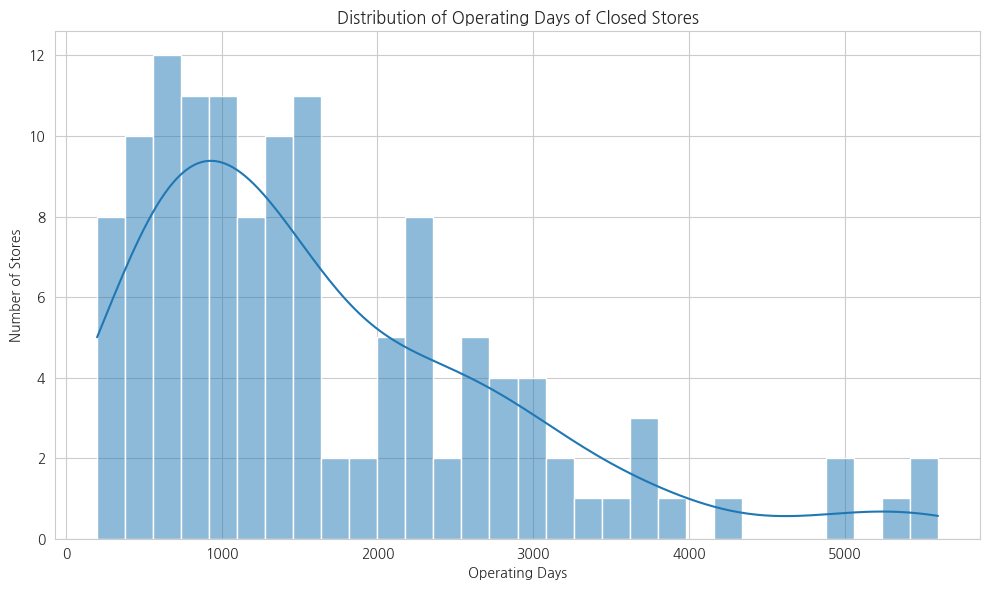

In [ ]:
# 폐업한 가게들의 영업일수
days = df_closed_last['end-start'].dt.days

plt.figure(figsize=(10, 6))
sns.histplot(days, bins=30, kde=True)

plt.xlabel('Operating Days')
plt.ylabel('Number of Stores')
plt.title('Distribution of Operating Days of Closed Stores')
plt.tight_layout()
plt.show()


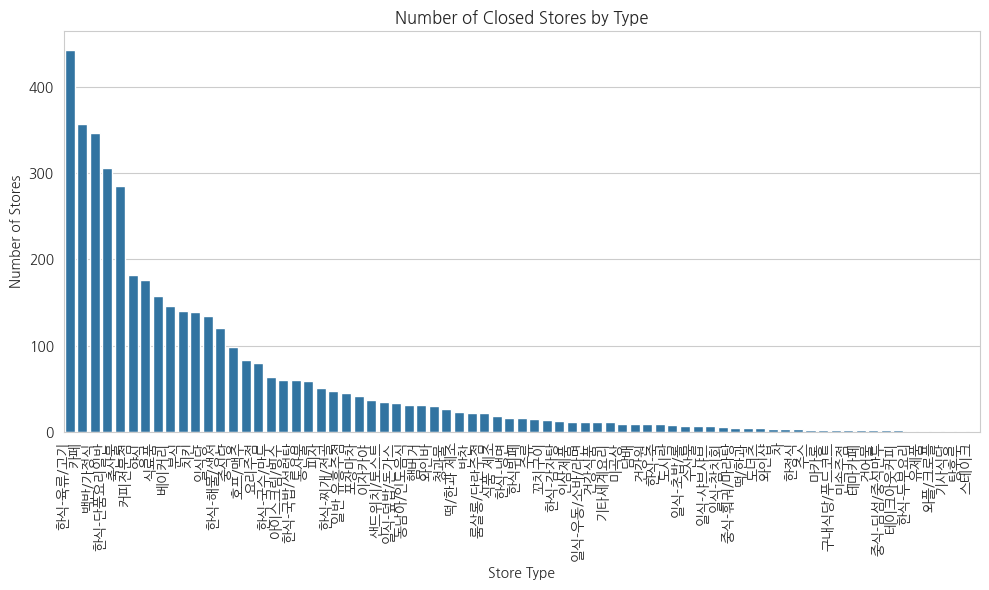

In [ ]:
# 업종(영업+폐업 포함)
counts = df.drop_duplicates(subset='ENCODED_MCT', keep='last')['HPSN_MCT_ZCD_NM'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)

plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.title('Number of Closed Stores by Type')
plt.xticks(rotation=90, ha='right')  # x축 라벨 회전
plt.tight_layout()
plt.show()


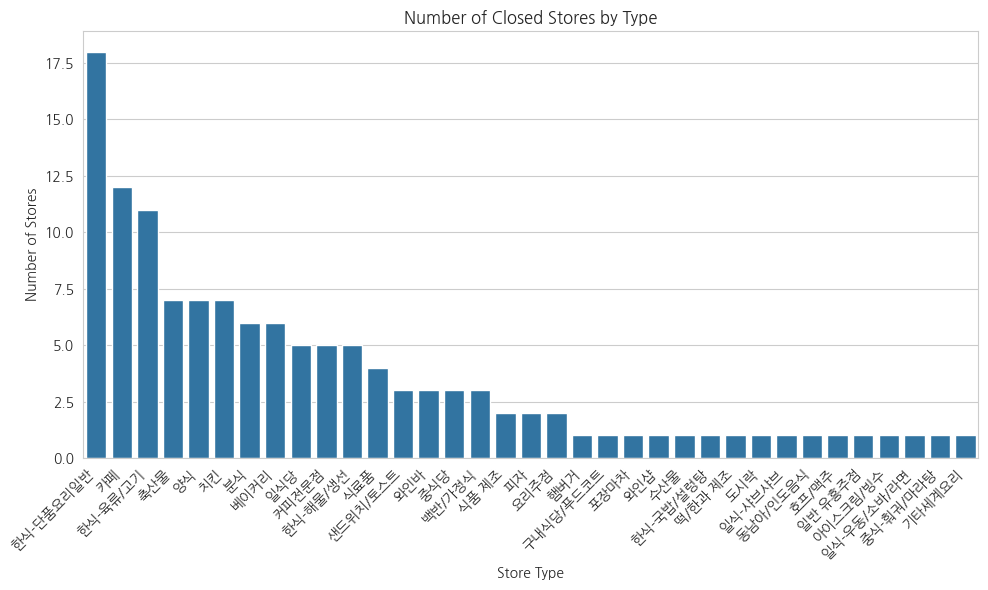

In [ ]:
# 폐업 업종(개수)
counts = df_closed_last['HPSN_MCT_ZCD_NM'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)

plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.title('Number of Closed Stores by Type')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.tight_layout()
plt.show()


/tmp/ipython-input-1144186485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=closure_rate.index, y=closure_rate.values, palette="Reds_r")  # 색상: 붉은 계열


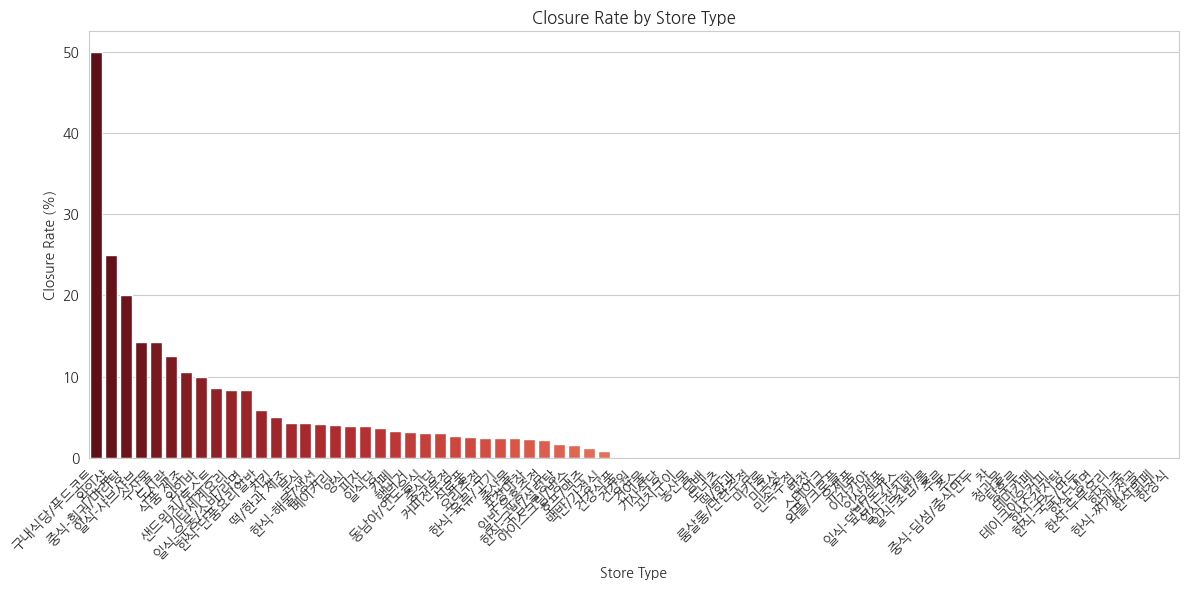

In [ ]:
# 업종별 폐업률

# 전체 업종별 가게 수
total_counts = df.drop_duplicates(subset='ENCODED_MCT', keep='last')['HPSN_MCT_ZCD_NM'].value_counts()

# 폐업 업종별 가게 수
closed_counts = df_closed_last['HPSN_MCT_ZCD_NM'].value_counts()

# 폐업률 계산 (업종별)
closure_rate = (closed_counts / total_counts * 100).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(x=closure_rate.index, y=closure_rate.values, palette="Reds_r")  # 색상: 붉은 계열
plt.ylabel('Closure Rate (%)')
plt.xlabel('Store Type')
plt.title('Closure Rate by Store Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-480034194.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_rate.index, rotation=90, ha='right')


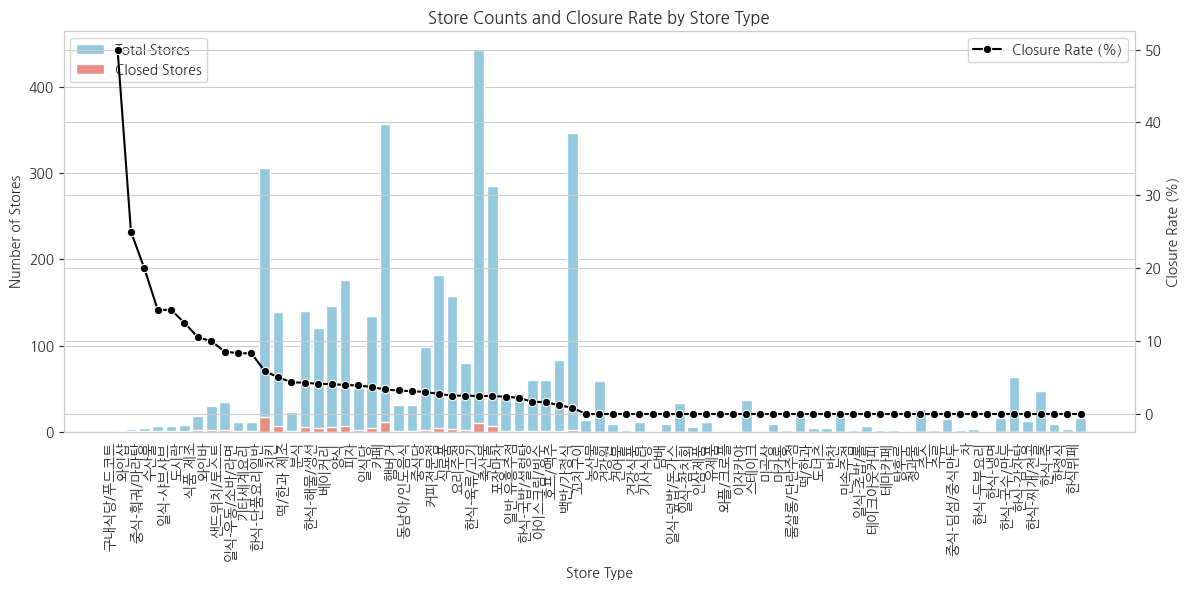

In [ ]:

# 전체 업종별 가게 수
total_counts = df.drop_duplicates(subset='ENCODED_MCT', keep='last')['HPSN_MCT_ZCD_NM'].value_counts()

# 폐업 업종별 가게 수
closed_counts = df_closed_last['HPSN_MCT_ZCD_NM'].value_counts()

df_rate = pd.DataFrame({
    'Total Stores': total_counts,
    'Closed Stores': closed_counts
}).fillna(0)  # 폐업 없는 업종은 0

# 폐업률 계산
df_rate['Closure Rate (%)'] = df_rate['Closed Stores'] / df_rate['Total Stores'] * 100

# 업종 기준으로 정렬 (폐업률 기준)
df_rate = df_rate.sort_values('Closure Rate (%)', ascending=False)

fig, ax1 = plt.subplots(figsize=(12,6))

# 막대그래프: 전체 가게 수, 폐업 가게 수
sns.barplot(x=df_rate.index, y=df_rate['Total Stores'], color='skyblue', label='Total Stores', ax=ax1)
sns.barplot(x=df_rate.index, y=df_rate['Closed Stores'], color='salmon', label='Closed Stores', ax=ax1)

ax1.set_ylabel('Number of Stores')
ax1.set_xlabel('Store Type')
ax1.set_xticklabels(df_rate.index, rotation=90, ha='right')

# 이중축: 폐업률
ax2 = ax1.twinx()
sns.lineplot(x=df_rate.index, y=df_rate['Closure Rate (%)'], color='black', marker='o', label='Closure Rate (%)', ax=ax2)
ax2.set_ylabel('Closure Rate (%)')

# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Store Counts and Closure Rate by Store Type')
plt.tight_layout()
plt.show()


### 타겟 분포 및 불균형 확인

In [ ]:
# 연월별 폐업 가게 수 /  해당 연월에 존재하는 전체 가게 수 / 폐업률
df.drop_duplicates(subset='ENCODED_MCT', keep='last').groupby('YM')['is_closed'].agg(['sum', 'count', 'mean'])

,sum,count,mean
YM,,,
2023-01-01,4,144,0.027778
2023-02-01,3,113,0.026549
2023-03-01,7,178,0.039326
2023-04-01,8,164,0.048780
2023-05-01,5,153,0.032680
2023-06-01,9,159,0.056604
2023-07-01,4,134,0.029851
2023-08-01,5,151,0.033113
2023-09-01,5,143,0.034965


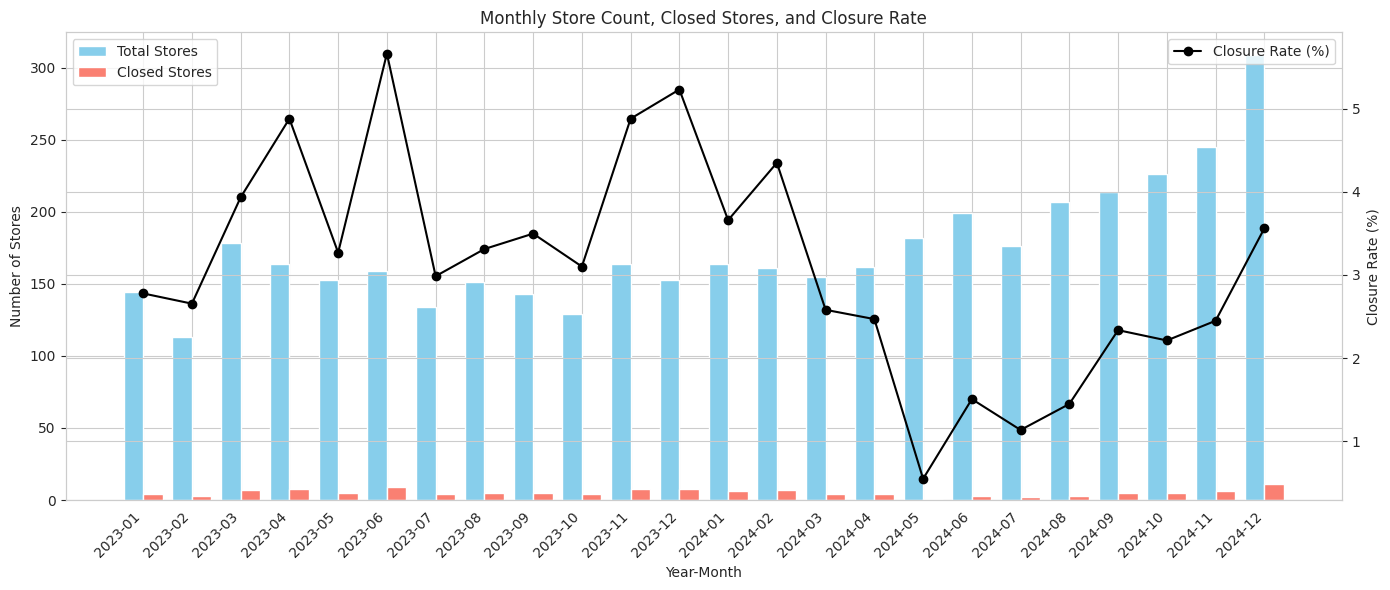

In [ ]:
# 시각화 ㄱㄱ

df_summary = df.drop_duplicates(subset='ENCODED_MCT', keep='last').groupby('YM')['is_closed'].agg(['sum', 'count', 'mean']).reset_index()
df_summary.rename(columns={'sum':'Closed', 'count':'Total', 'mean':'Closure Rate'}, inplace=True)

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14,6))

# 막대그래프: Total, Closed
bar_width = 0.4
x = range(len(df_summary))
ax1.bar([i-bar_width/2 for i in x], df_summary['Total'], width=bar_width, color='skyblue', label='Total Stores')
ax1.bar([i+bar_width/2 for i in x], df_summary['Closed'], width=bar_width, color='salmon', label='Closed Stores')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Stores')
ax1.set_xticks(x)
ax1.set_xticklabels(df_summary['YM'].dt.strftime('%Y-%m'), rotation=45, ha='right')

# 이중축: Closure Rate (%)
ax2 = ax1.twinx()
ax2.plot(x, df_summary['Closure Rate']*100, color='black', marker='o', label='Closure Rate (%)')
ax2.set_ylabel('Closure Rate (%)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Monthly Store Count, Closed Stores, and Closure Rate')
plt.tight_layout()
plt.show()


### 시간대별 생존 분석

In [ ]:
# 운영 기간별 폐업률
df['operating_months'] = df.groupby('ENCODED_MCT')['TA_YM'].transform('count')
survival_by_period = df.groupby('operating_months')['is_closed'].mean()
survival_by_period


,is_closed
operating_months,
1,0.076923
2,0.043478
3,0.016949
4,0.075472
5,0.068966
6,0.021277
7,0.037736
8,0.042857
9,0.035714


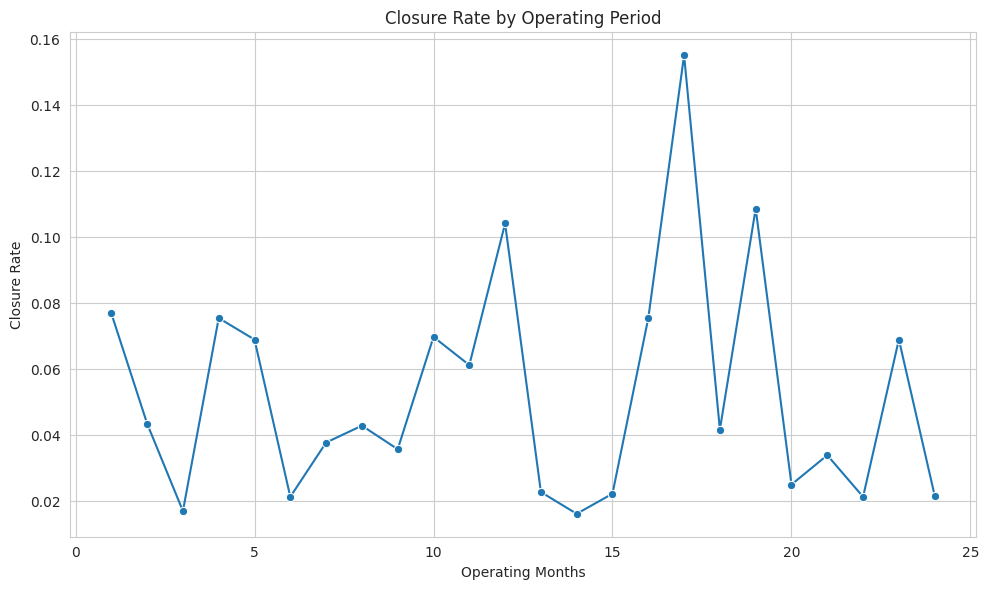

In [ ]:
survival_by_period = df.groupby('operating_months')['is_closed'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=survival_by_period, x='operating_months', y='is_closed', marker='o')
plt.xlabel('Operating Months')
plt.ylabel('Closure Rate')
plt.title('Closure Rate by Operating Period')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 계절성 패턴
df['month'] = df['TA_YM'] % 100
seasonal_closure = df.groupby('month')['is_closed'].mean()
seasonal_closure


,is_closed
month,
1,0.029104
2,0.028791
3,0.028430
4,0.027838
5,0.027145
6,0.026797
7,0.026457
8,0.026748
9,0.026527


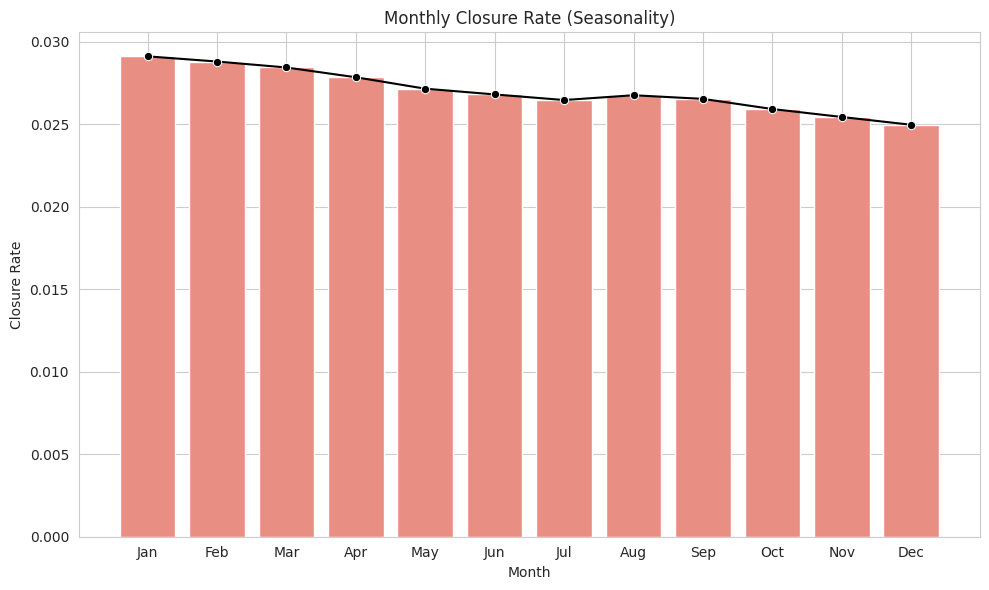

In [ ]:
seasonal_closure = df.groupby('month')['is_closed'].mean().reset_index()
seasonal_closure['month'] = seasonal_closure['month'].astype(int)

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
seasonal_closure['month_name'] = seasonal_closure['month'].apply(lambda x: month_names[x-1])

plt.figure(figsize=(10,6))
sns.barplot(x='month_name', y='is_closed', data=seasonal_closure, color='salmon', order=month_names)
sns.lineplot(x='month_name', y='is_closed', data=seasonal_closure, color='black', marker='o', sort=False)

plt.xlabel('Month')
plt.ylabel('Closure Rate')
plt.title('Monthly Closure Rate (Seasonality)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
age_columns = ['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT',
               'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
               'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT',
               'M12_FME_50_RAT', 'M12_FME_60_RAT']


In [ ]:
avg_age_long

,months_before_closure,Age_Group,Proportion
0,0,M12_MAL_1020_RAT,13.003658
1,1,M12_MAL_1020_RAT,12.738728
2,2,M12_MAL_1020_RAT,12.574151
3,3,M12_MAL_1020_RAT,13.062687
4,4,M12_MAL_1020_RAT,12.903442
5,5,M12_MAL_1020_RAT,12.724643
6,0,M12_MAL_30_RAT,13.409397
7,1,M12_MAL_30_RAT,13.404167
8,2,M12_MAL_30_RAT,13.223495
9,3,M12_MAL_30_RAT,13.613866


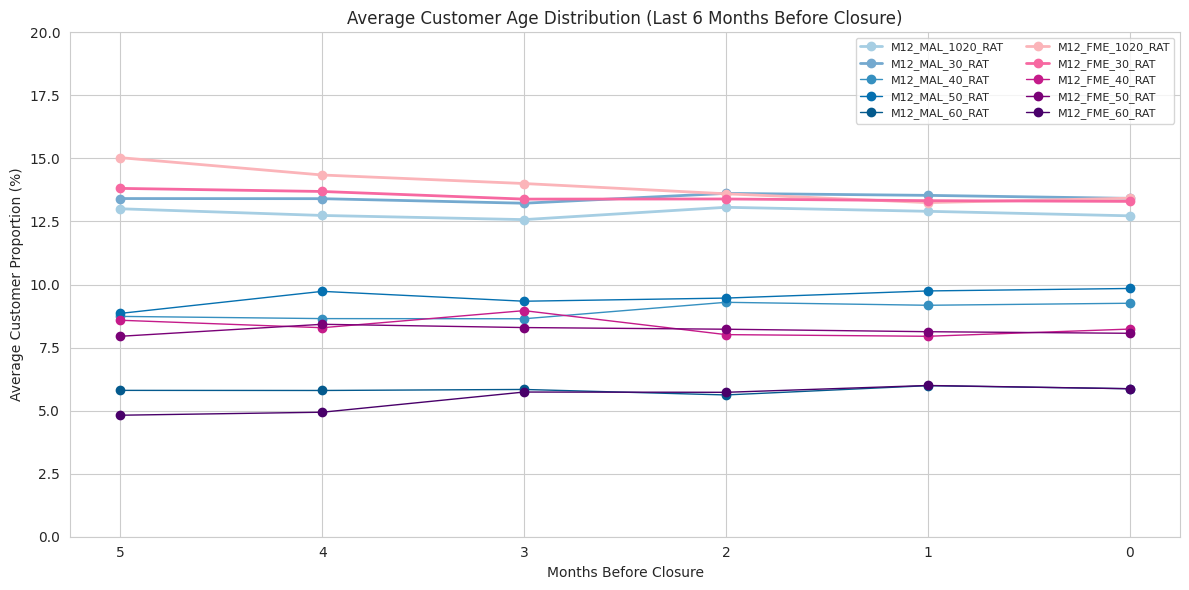

In [ ]:
closed_df = df[df['is_closed'] == True].copy()

closed_df['months_before_closure'] = closed_df.groupby('ENCODED_MCT')['TA_YM'].transform(lambda x: x.max() - x)

last_6months_before_closure = closed_df[closed_df['months_before_closure'] < 6].copy()

last_6months_before_closure['months_before_closure'] = 5 - last_6months_before_closure['months_before_closure']

avg_age_before_closure = last_6months_before_closure.groupby('months_before_closure')[age_columns].mean().reset_index()

avg_age_long = avg_age_before_closure.melt(id_vars='months_before_closure',
                                           value_vars=age_columns,
                                           var_name='Age_Group',
                                           value_name='Proportion')

# 색상 정의: 남성 푸른계, 여성 붉은계, 나이가 많을수록 어두움
palette = {
    'M12_MAL_1020_RAT':'#a6cee3',  # 남성 10~20대 밝은 파랑
    'M12_MAL_30_RAT':'#74a9cf',    # 남성 30대 조금 더 밝은 파랑
    'M12_MAL_40_RAT':'#3690c0',    # 남성 40대 중간 파랑
    'M12_MAL_50_RAT':'#0570b0',    # 남성 50대 진한 파랑
    'M12_MAL_60_RAT':'#045a8d',    # 남성 60대 가장 진한 파랑

    'M12_FME_1020_RAT':'#fbb4b9',  # 여성 10~20대 밝은 빨강
    'M12_FME_30_RAT':'#f768a1',    # 여성 30대 조금 더 밝은 빨강
    'M12_FME_40_RAT':'#c51b8a',    # 여성 40대 중간 빨강
    'M12_FME_50_RAT':'#7a0177',    # 여성 50대 진한 빨강
    'M12_FME_60_RAT':'#49006a'     # 여성 60대 가장 진한 빨강
}


plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

for age_group in age_columns:
    subset = avg_age_long[avg_age_long['Age_Group'] == age_group]
    plt.plot(subset['months_before_closure'], subset['Proportion'],
             label=age_group,
             color=palette[age_group],
             marker='o',
             linewidth=2 if '1020' in age_group or '30' in age_group else 1)

plt.xlabel('Months Before Closure')
plt.ylabel('Average Customer Proportion (%)')
plt.title('Average Customer Age Distribution (Last 6 Months Before Closure)')

plt.xticks(range(6), ['5','4','3','2','1','0'])  # 0 = 폐업 직전
plt.ylim(0, 20)
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
# 지역별 폐업 클러스터링
area_closure_rate = df.groupby(['HPSN_MCT_BZN_CD_NM', 'TA_YM'])['is_closed'].agg(['sum', 'count', 'mean'])

# 같은 상권 내 폐업 연쇄 효과
def analyze_contagion_effect(df):
    # 월별 지역별 폐업률 계산
    monthly_area_stats = df.groupby(['HPSN_MCT_BZN_CD_NM', 'TA_YM']).agg({
        'is_closed': ['sum', 'count', 'mean'],
        'ENCODED_MCT': 'nunique'
    }).reset_index()

    # 전월 대비 폐업률 증가와 현재 월 생존점 위험도 관계
    return monthly_area_stats

contagion_data = analyze_contagion_effect(df)
contagion_data

HPSN_MCT_BZN_CD_NM   TA_YM is_closed            ENCODED_MCT
                                     sum count mean     nunique
0                 건대입구  202301         0     1  0.0           1
1                 건대입구  202302         0     1  0.0           1
2                 건대입구  202303         0     1  0.0           1
3                 건대입구  202304         0     1  0.0           1
4                 건대입구  202305         0     1  0.0           1
..                 ...     ...       ...   ...  ...         ...
466               화양시장  202408         0     1  0.0           1
467               화양시장  202409         0     1  0.0           1
468               화양시장  202410         0     1  0.0           1
469               화양시장  202411         0     1  0.0           1
470               화양시장  202412         0     1  0.0           1

[471 rows x 6 columns]

In [ ]:
def create_closure_timeline_analysis(df):
    closed_stores = df[df['is_closed'] == True]

    # 각 폐업점의 마지막 운영월 찾기
    last_month_by_store = closed_stores.groupby('ENCODED_MCT')['TA_YM'].max()

    timeline_data = []

    for store_id, last_month in last_month_by_store.items():
        store_data = df[df['ENCODED_MCT'] == store_id].sort_values('TA_YM')

        # 폐업 전 6개월, 3개월, 1개월 시점 데이터 추출
        for months_before in [6, 3, 1]:
            target_month = last_month - months_before
            period_data = store_data[store_data['TA_YM'] == target_month]

            if not period_data.empty:
                timeline_data.append({
                    'store_id': store_id,
                    'months_before_closure': months_before,
                    **period_data.iloc[0].to_dict()
                })

    return pd.DataFrame(timeline_data)

timeline_df = create_closure_timeline_analysis(df)
timeline_df

,store_id,months_before_closure,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,...,is_closed,start,end,year,month,YM,operating_months,RC_M1_SAA_numeric,RC_M1_UE_CUS_CN_numeric,revenue_per_customer
0,04393D7C92,6,04393D7C92,서울특별시 성동구 왕십리로 357,왕십*****,NaN,한식-육류/고기,NaN,20190313,20250723.0,...,True,2019-03-13,2025-07-23,2024,6,2024-06-01,24,NaN,NaN,NaN
1,04393D7C92,3,04393D7C92,서울특별시 성동구 왕십리로 357,왕십*****,NaN,한식-육류/고기,NaN,20190313,20250723.0,...,True,2019-03-13,2025-07-23,2024,9,2024-09-01,24,NaN,NaN,NaN
2,04393D7C92,1,04393D7C92,서울특별시 성동구 왕십리로 357,왕십*****,NaN,한식-육류/고기,NaN,20190313,20250723.0,...,True,2019-03-13,2025-07-23,2024,11,2024-11-01,24,NaN,NaN,NaN
3,0507C6C859,6,0507C6C859,서울특별시 성동구 금호로 148-1,가띠**,NaN,샌드위치/토스트,신금호,20230817,20250819.0,...,True,2023-08-17,2025-08-19,2024,6,2024-06-01,17,NaN,NaN,NaN
4,0507C6C859,3,0507C6C859,서울특별시 성동구 금호로 148-1,가띠**,NaN,샌드위치/토스트,신금호,20230817,20250819.0,...,True,2023-08-17,2025-08-19,2024,9,2024-09-01,17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,FBC56DE125,1,FBC56DE125,서울특별시 성동구 연무장15길 11,쁘띠*****************,NaN,양식,NaN,20220729,20250220.0,...,True,2022-07-29,2025-02-20,2024,11,2024-11-01,24,NaN,NaN,NaN
345,FCAF2BC53E,6,FCAF2BC53E,서울 성동구 마조로 21.,빽다******,커피전문점4,커피전문점,한양대,20150731,20250818.0,...,True,2015-07-31,2025-08-18,2024,6,2024-06-01,24,NaN,NaN,NaN
346,FCAF2BC53E,3,FCAF2BC53E,서울 성동구 마조로 21.,빽다******,커피전문점4,커피전문점,한양대,20150731,20250818.0,...,True,2015-07-31,2025-08-18,2024,9,2024-09-01,24,NaN,NaN,NaN
347,FCAF2BC53E,1,FCAF2BC53E,서울 성동구 마조로 21.,빽다******,커피전문점4,커피전문점,한양대,20150731,20250818.0,...,True,2015-07-31,2025-08-18,2024,11,2024-11-01,24,NaN,NaN,NaN


/tmp/ipython-input-2684411490.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=last_6months, x='months_before_closure', y='RC_M1_SAA_num', palette="Blues")


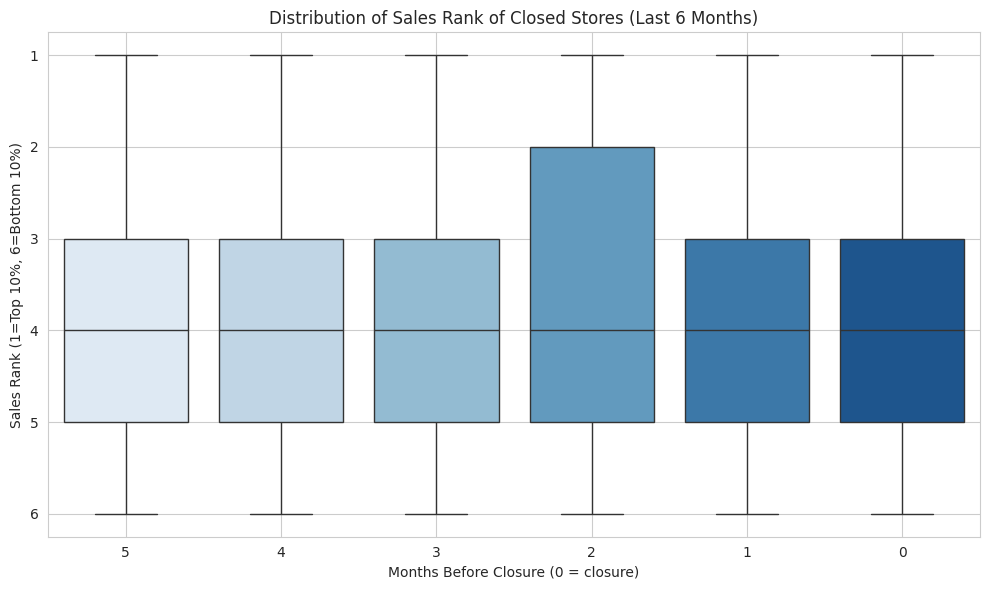

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폐업 가게만 추출
closed_df = df[df['is_closed'] == True].copy()

# 각 가게별 폐업 직전 6개월 기준 months_before_closure 계산
closed_df['months_before_closure'] = closed_df.groupby('ENCODED_MCT')['TA_YM'].transform(lambda x: x.max() - x)

# 폐업 전 6개월 이내 데이터만
last_6months = closed_df[closed_df['months_before_closure'] < 6].copy()

# months_before_closure를 5->0 형태로 변환 (0 = 폐업 직전)
last_6months['months_before_closure'] = 5 - last_6months['months_before_closure']

# 매출 구간 숫자 컬럼 생성
sales_order = {
    '1_10%이하': 1,
    '2_10-25%': 2,
    '3_25-50%': 3,
    '4_50-75%': 4,
    '5_75-90%': 5,
    '6_90%초과(하위 10% 이하)': 6
}
last_6months['RC_M1_SAA_num'] = last_6months['RC_M1_SAA'].map(sales_order)

# 시각화
plt.figure(figsize=(10,6))
sns.boxplot(data=last_6months, x='months_before_closure', y='RC_M1_SAA_num', palette="Blues")

plt.xticks(range(6), ['5','4','3','2','1','0'])
plt.xlabel('Months Before Closure (0 = closure)')
plt.ylabel('Sales Rank (1=Top 10%, 6=Bottom 10%)')
plt.title('Distribution of Sales Rank of Closed Stores (Last 6 Months)')
plt.gca().invert_yaxis()  # 1이 상위, 6이 하위 → 위로 갈수록 상위
plt.grid(True)
plt.tight_layout()
plt.show()


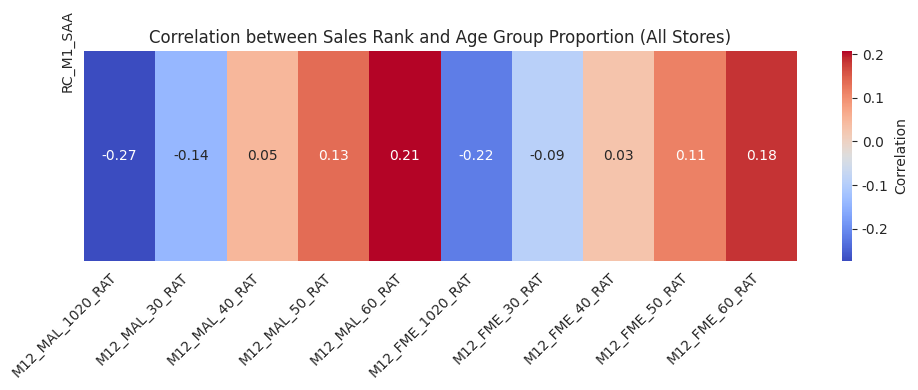

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 매출 구간 숫자 컬럼 생성
sales_order = {
    '1_10%이하': 1,
    '2_10-25%': 2,
    '3_25-50%': 3,
    '4_50-75%': 4,
    '5_75-90%': 5,
    '6_90%초과(하위 10% 이하)': 6
}
df['RC_M1_SAA_num'] = df['RC_M1_SAA'].map(sales_order)

# 연령대 컬럼
age_columns = ['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT',
               'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
               'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT',
               'M12_FME_50_RAT', 'M12_FME_60_RAT']

# 상관계수 계산
corr_df = df[['RC_M1_SAA_num'] + age_columns].corr()

# 매출 구간과 연령대 상관계수만 선택
corr_sales_age = corr_df.loc['RC_M1_SAA_num', age_columns]

# 시각화
plt.figure(figsize=(10,4))
sns.heatmap(corr_sales_age.to_frame().T, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Correlation'})
plt.title('Correlation between Sales Rank and Age Group Proportion (All Stores)')
plt.yticks([0], ['RC_M1_SAA'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- 음수 → 해당 연령 비중이 높을수록 매출 상위 구간 (1~6 중 1에 가까움)
- 양수 → 해당 연령 비중이 높을수록 매출 하위 구간 (6에 가까움)

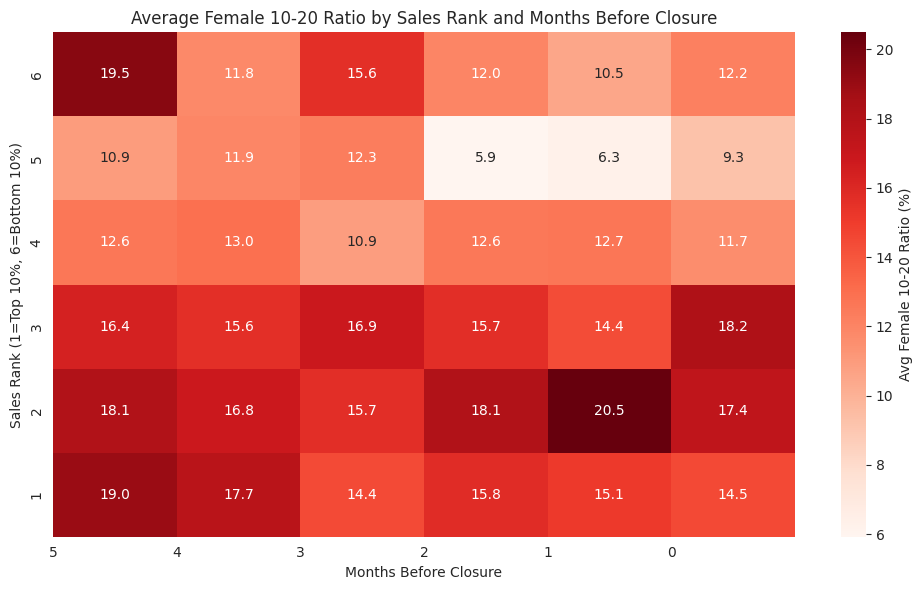

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pivot 테이블로 변환
heatmap_data = last_6months.pivot_table(
    index='RC_M1_SAA_num',
    columns='months_before_closure',
    values='F_10_20_ratio',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label':'Avg Female 10-20 Ratio (%)'})
plt.gca().invert_yaxis()  # 1=상위, 6=하위
plt.xlabel('Months Before Closure')
plt.ylabel('Sales Rank (1=Top 10%, 6=Bottom 10%)')
plt.title('Average Female 10-20 Ratio by Sales Rank and Months Before Closure')
plt.xticks(range(6), ['5','4','3','2','1','0'])
plt.tight_layout()
plt.show()


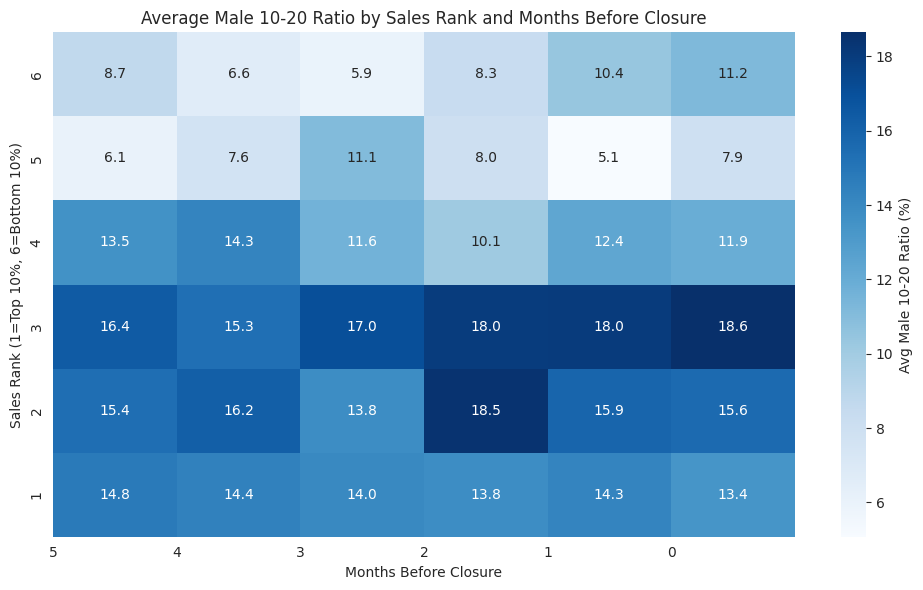

In [ ]:
# 10~20대 남성 비중 기준 히트맵
plt.figure(figsize=(10,6))

heatmap_data_male = last_6months.pivot_table(
    index='RC_M1_SAA_num',
    columns='months_before_closure',
    values='M12_MAL_1020_RAT',  # 10~20대 남성 비중
    aggfunc='mean'
)

sns.heatmap(heatmap_data_male, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label':'Avg Male 10-20 Ratio (%)'})
plt.gca().invert_yaxis()  # 1=상위, 6=하위
plt.xlabel('Months Before Closure')
plt.ylabel('Sales Rank (1=Top 10%, 6=Bottom 10%)')
plt.title('Average Male 10-20 Ratio by Sales Rank and Months Before Closure')
plt.xticks(range(6), ['5','4','3','2','1','0'])
plt.tight_layout()
plt.show()


In [ ]:
# 폐업하지 않은 가게 포함, 마지막 달 기준
last_month_df = df.groupby('ENCODED_MCT').last().reset_index()

age_cols = ['M12_MAL_1020_RAT','M12_MAL_30_RAT','M12_MAL_40_RAT','M12_MAL_50_RAT','M12_MAL_60_RAT',
            'M12_FME_1020_RAT','M12_FME_30_RAT','M12_FME_40_RAT','M12_FME_50_RAT','M12_FME_60_RAT']

correlations = last_month_df[age_cols + ['RC_M1_SAA_num']].corr()['RC_M1_SAA_num']
print(correlations)


M12_MAL_1020_RAT   -0.275102
M12_MAL_30_RAT     -0.123750
M12_MAL_40_RAT      0.045037
M12_MAL_50_RAT      0.136902
M12_MAL_60_RAT      0.187148
M12_FME_1020_RAT   -0.217298
M12_FME_30_RAT     -0.101360
M12_FME_40_RAT      0.047242
M12_FME_50_RAT      0.100758
M12_FME_60_RAT      0.186804
RC_M1_SAA_num       1.000000
Name: RC_M1_SAA_num, dtype: float64


## 다시

In [ ]:
print("🔍 성동구 가맹점 데이터 기초 탐색")
print("=" * 50)

# 1. 기본 현황 파악
print("📊 1. 기본 데이터 현황")

# 가맹점별 고유 정보 추출
unique_stores = df.drop_duplicates(subset=['ENCODED_MCT'])

print(f"전체 레코드: {len(df):,}개")
print(f"고유 가맹점: {len(unique_stores):,}개")
print(f"폐업 가맹점: {unique_stores['is_closed'].sum():,}개 ({unique_stores['is_closed'].mean()*100:.1f}%)")
print(f"생존 가맹점: {(~unique_stores['is_closed']).sum():,}개 ({(~unique_stores['is_closed']).mean()*100:.1f}%)")

if 'TA_YM' in df.columns:
    print(f"관측 기간: {df['TA_YM'].min()} ~ {df['TA_YM'].max()}")

print("\n" + "=" * 50)

🔍 성동구 가맹점 데이터 기초 탐색
📊 1. 기본 데이터 현황
전체 레코드: 86,590개
고유 가맹점: 4,185개
폐업 가맹점: 127개 (3.0%)
생존 가맹점: 4,058개 (97.0%)
관측 기간: 202301 ~ 202412



In [ ]:
# 2. 시간대별 폐업 패턴 분석 (폐업일 기준)
print("📈 2. 시간대별 폐업 패턴")

# 폐업일이 있는 가맹점들만 분석
closed_stores = unique_stores[unique_stores['is_closed']].copy()

if len(closed_stores) > 0 and 'MCT_ME_D' in closed_stores.columns:
    # 폐업일을 datetime으로 변환
    closed_stores['close_date'] = pd.to_datetime(closed_stores['MCT_ME_D'], format='%Y%m%d', errors='coerce')
    closed_stores['close_year'] = closed_stores['close_date'].dt.year
    closed_stores['close_month'] = closed_stores['close_date'].dt.month

    # 연도별 폐업 현황
    yearly_closures = closed_stores['close_year'].value_counts().sort_index()
    print("연도별 폐업 건수:")
    for year, count in yearly_closures.items():
        if pd.notna(year):
            print(f"- {int(year)}년: {count}개")

    # 월별 폐업 현황
    monthly_closures = closed_stores['close_month'].value_counts().sort_index()
    print(f"\n월별 폐업 건수:")
    for month, count in monthly_closures.items():
        if pd.notna(month):
            print(f"- {int(month)}월: {count}개")

    # 계절별 폐업 패턴
    season_mapping = {12: '겨울', 1: '겨울', 2: '겨울',
                     3: '봄', 4: '봄', 5: '봄',
                     6: '여름', 7: '여름', 8: '여름',
                     9: '가을', 10: '가을', 11: '가을'}

    closed_stores['season'] = closed_stores['close_month'].map(season_mapping)
    seasonal_closures = closed_stores['season'].value_counts()
    print(f"\n계절별 폐업 건수:")
    for season, count in seasonal_closures.items():
        if pd.notna(season):
            print(f"- {season}: {count}개")

print("\n" + "=" * 50)

📈 2. 시간대별 폐업 패턴
연도별 폐업 건수:
- 2023년: 15개
- 2024년: 15개
- 2025년: 97개

월별 폐업 건수:
- 1월: 4개
- 2월: 2개
- 3월: 2개
- 4월: 7개
- 5월: 7개
- 6월: 2개
- 7월: 56개
- 8월: 37개
- 9월: 3개
- 10월: 4개
- 11월: 3개

계절별 폐업 건수:
- 여름: 95개
- 봄: 16개
- 가을: 10개
- 겨울: 6개



In [ ]:
# 3. 업종별 분석
print("🏪 3. 업종별 폐업 위험도")

if 'HPSN_MCT_ZCD_NM' in unique_stores.columns:
    # 업종별 폐업률 계산 (충분한 샘플이 있는 업종만)
    business_stats = unique_stores.groupby('HPSN_MCT_ZCD_NM').agg({
        'is_closed': ['sum', 'count', 'mean']
    }).round(3)
    business_stats.columns = ['폐업수', '총가게수', '폐업률']
    business_stats = business_stats[business_stats['총가게수'] >= 10]  # 10개 이상 샘플
    business_stats = business_stats.sort_values('폐업률', ascending=False)

    print("업종별 폐업률 (상위 10개):")
    print(business_stats.head(10))

    if len(business_stats) > 0:
        # 가장 위험한 업종 vs 가장 안전한 업종
        most_dangerous = business_stats.index[0]
        safest = business_stats.index[-1]
        print(f"\n🚨 최고 위험 업종: {most_dangerous} (폐업률: {business_stats.loc[most_dangerous, '폐업률']*100:.1f}%)")
        print(f"✅ 최고 안전 업종: {safest} (폐업률: {business_stats.loc[safest, '폐업률']*100:.1f}%)")

print("\n" + "=" * 50)

🏪 3. 업종별 폐업 위험도
업종별 폐업률 (상위 10개):
                 폐업수  총가게수    폐업률
HPSN_MCT_ZCD_NM                  
식품 제조              2    19  0.105
와인바                3    30  0.100
샌드위치/토스트           3    35  0.086
일식-우동/소바/라면        1    12  0.083
기타세계요리             1    12  0.083
한식-단품요리일반         18   306  0.059
치킨                 7   139  0.050
떡/한과 제조            1    23  0.043
분식                 6   140  0.043
한식-해물/생선           5   121  0.041

🚨 최고 위험 업종: 식품 제조 (폐업률: 10.5%)
✅ 최고 안전 업종: 한식뷔페 (폐업률: 0.0%)



In [ ]:
# 4. 매출 규모별 분석 (시계열 데이터 활용)
print("💰 4. 매출 규모별 생존율")

if 'RC_M1_SAA' in df.columns:
    # 각 가맹점의 평균 매출 구간 계산
    def segment_to_score(segment):
        if pd.isna(segment):
            return np.nan
        segment_map = {'1_10%이하': 6, '2_10-25%': 5, '3_25-50%': 4,
                      '4_50-75%': 3, '5_75-90%': 2, '6_90%초과(하위 10% 이하)': 1}
        return segment_map.get(segment, np.nan)

    df['revenue_score'] = df['RC_M1_SAA'].apply(segment_to_score)

    # 가맹점별 평균 매출 점수
    store_revenue = df.groupby('ENCODED_MCT').agg({
        'revenue_score': 'mean',
        'is_closed': 'first'
    })

    # 매출 구간별 분석
    revenue_categories = pd.cut(store_revenue['revenue_score'],
                              bins=[0, 2, 3, 4, 5, 6],
                              labels=['최하위', '하위', '중위', '상위', '최상위'])

    revenue_closure_stats = pd.crosstab(revenue_categories,
                                       store_revenue['is_closed'],
                                       normalize='index') * 100

    print("매출 구간별 폐업률:")
    if True in revenue_closure_stats.columns:
        for category in revenue_closure_stats.index:
            if pd.notna(category):
                closure_rate = revenue_closure_stats.loc[category, True]
                print(f"- {category} 매출: {closure_rate:.1f}%")

print("\n" + "=" * 50)


💰 4. 매출 규모별 생존율
매출 구간별 폐업률:
- 최하위 매출: 4.7%
- 하위 매출: 2.8%
- 중위 매출: 2.2%
- 상위 매출: 3.2%
- 최상위 매출: 2.9%



In [ ]:
# 5. 고객 연령층 분석 (시계열 데이터 활용)
print("👥 5. 고객 연령층별 생존 패턴")

age_columns = ['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT',
               'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT']


if all(col in df.columns for col in ['M12_MAL_1020_RAT', 'M12_FME_1020_RAT']):
    # 연령대별 비중 계산
    df['young_ratio'] = df['M12_MAL_1020_RAT'].fillna(0) + df['M12_FME_1020_RAT'].fillna(0)

    if 'M12_MAL_30_RAT' in df.columns and 'M12_FME_30_RAT' in df.columns:
        df['middle_ratio'] = df['M12_MAL_30_RAT'].fillna(0) + df['M12_FME_30_RAT'].fillna(0)

    if 'M12_MAL_50_RAT' in df.columns and 'M12_FME_50_RAT' in df.columns:
        df['senior_ratio'] = df['M12_MAL_50_RAT'].fillna(0) + df['M12_FME_50_RAT'].fillna(0)

    # 가맹점별 평균 연령층 비중
    store_age_data = df.groupby('ENCODED_MCT').agg({
        'young_ratio': 'mean',
        'middle_ratio': 'mean' if 'middle_ratio' in df.columns else lambda x: np.nan,
        'senior_ratio': 'mean' if 'senior_ratio' in df.columns else lambda x: np.nan,
        'is_closed': 'first'
    })

    # 폐업 vs 생존 비교
    age_comparison = store_age_data.groupby('is_closed')[['young_ratio', 'middle_ratio', 'senior_ratio']].mean()
    print("폐업 vs 생존 가게의 고객 연령층 비중:")
    print(age_comparison)

    if len(age_comparison) >= 2:
        young_diff = age_comparison.loc[False, 'young_ratio'] - age_comparison.loc[True, 'young_ratio']
        senior_diff = age_comparison.loc[True, 'senior_ratio'] - age_comparison.loc[False, 'senior_ratio']

        print(f"\n💡 인사이트:")
        print(f"- 생존 가게가 폐업 가게보다 20대 고객 {young_diff:.1f}%p 더 많음")
        print(f"- 폐업 가게가 생존 가게보다 50대 고객 {senior_diff:.1f}%p 더 많음")

print("\n" + "=" * 50)


👥 5. 고객 연령층별 생존 패턴
폐업 vs 생존 가게의 고객 연령층 비중:
           young_ratio  middle_ratio  senior_ratio
is_closed                                         
False        22.009118     24.438730     18.289722
True         26.812644     25.182231     16.462207

💡 인사이트:
- 생존 가게가 폐업 가게보다 20대 고객 -4.8%p 더 많음
- 폐업 가게가 생존 가게보다 50대 고객 -1.8%p 더 많음



In [ ]:
# 6. 재방문율 분석
print("🔄 6. 재방문율과 생존의 관계")

if 'MCT_UE_CLN_REU_RAT' in df.columns:
    # -999999.9를 NaN으로 처리
    df['MCT_UE_CLN_REU_RAT'] = df['MCT_UE_CLN_REU_RAT'].replace(-999999.9, np.nan)

    # 가맹점별 평균 재방문율
    store_revisit = df.groupby('ENCODED_MCT').agg({
        'MCT_UE_CLN_REU_RAT': 'mean',
        'is_closed': 'first'
    })

    # 재방문율 정보가 있는 가맹점만
    store_revisit_clean = store_revisit[store_revisit['MCT_UE_CLN_REU_RAT'].notna()]

    if len(store_revisit_clean) > 0:
        revisit_quartiles = store_revisit_clean['MCT_UE_CLN_REU_RAT'].quantile([0, 0.25, 0.5, 0.75, 1.0])
        print("재방문율 구간:")
        print(f"- 하위 25%: ~{revisit_quartiles[0.25]:.1f}%")
        print(f"- 중하위 25%: {revisit_quartiles[0.25]:.1f}~{revisit_quartiles[0.5]:.1f}%")
        print(f"- 중상위 25%: {revisit_quartiles[0.5]:.1f}~{revisit_quartiles[0.75]:.1f}%")
        print(f"- 상위 25%: {revisit_quartiles[0.75]:.1f}%~")

        # 재방문율과 폐업률의 관계
        revisit_vs_closure = store_revisit_clean.groupby('is_closed')['MCT_UE_CLN_REU_RAT'].mean()
        if len(revisit_vs_closure) >= 2:
            print(f"\n재방문율 비교:")
            print(f"- 생존 가게 평균 재방문율: {revisit_vs_closure[False]:.1f}%")
            print(f"- 폐업 가게 평균 재방문율: {revisit_vs_closure[True]:.1f}%")
            print(f"- 차이: {revisit_vs_closure[False] - revisit_vs_closure[True]:.1f}%p")

print("\n" + "=" * 50)

🔄 6. 재방문율과 생존의 관계
재방문율 구간:
- 하위 25%: ~13.9%
- 중하위 25%: 13.9~23.4%
- 중상위 25%: 23.4~32.9%
- 상위 25%: 32.9%~

재방문율 비교:
- 생존 가게 평균 재방문율: 24.5%
- 폐업 가게 평균 재방문율: 22.7%
- 차이: 1.8%p



In [ ]:
# 7. 운영 기간별 분석
print("⏰ 7. 운영 기간과 폐업 위험도")

if all(col in unique_stores.columns for col in ['ARE_D', 'MCT_ME_D']):
    # 개업일과 폐업일을 datetime으로 변환
    unique_stores = unique_stores.copy()
    unique_stores['start_date'] = pd.to_datetime(unique_stores['ARE_D'], format='%Y%m%d', errors='coerce')
    unique_stores['end_date'] = pd.to_datetime(unique_stores['MCT_ME_D'], format='%Y%m%d', errors='coerce')

    # 운영 기간 계산 (개월)
    current_date = pd.Timestamp.now()
    unique_stores['operating_months'] = unique_stores.apply(lambda x:
        ((x['end_date'] if pd.notna(x['end_date']) else current_date) - x['start_date']).days / 30.44
        if pd.notna(x['start_date']) else np.nan, axis=1)

    # 운영 기간 구간별 분석
    operating_bins = [0, 6, 12, 18, 24, 36, float('inf')]
    operating_labels = ['6개월이하', '6-12개월', '12-18개월', '18-24개월', '24-36개월', '36개월이상']

    unique_stores['operating_category'] = pd.cut(unique_stores['operating_months'],
                                               bins=operating_bins,
                                               labels=operating_labels,
                                               right=False)

    operating_closure_stats = pd.crosstab(unique_stores['operating_category'],
                                        unique_stores['is_closed'],
                                        normalize='index') * 100

    print("운영 기간별 폐업률:")
    if True in operating_closure_stats.columns:
        for category in operating_closure_stats.index:
            if pd.notna(category):
                closure_rate = operating_closure_stats.loc[category, True]
                total_stores = operating_closure_stats.loc[category, :].sum()
                print(f"- {category}: {closure_rate:.1f}% (총 {total_stores:.0f}개 가맹점)")

print("\n" + "=" * 50)


⏰ 7. 운영 기간과 폐업 위험도
운영 기간별 폐업률:
- 6-12개월: 5.3% (총 100개 가맹점)
- 12-18개월: 2.4% (총 100개 가맹점)
- 18-24개월: 4.4% (총 100개 가맹점)
- 24-36개월: 4.3% (총 100개 가맹점)
- 36개월이상: 2.6% (총 100개 가맹점)



### 시계열 분석

In [ ]:
# 1. 데이터 준비 및 전처리

# 매출 관련 구간을 수치형으로 변환 (구간의 중간값 사용)
segment_mapping = {
    '1_10%이하': 5,
    '2_10-25%': 17.5,
    '3_25-50%': 37.5,
    '4_50-75%': 62.5,
    '5_75-90%': 82.5,
    '6_90%초과(하위 10% 이하)': 95
}

df['SALES_SCORE'] = df['RC_M1_SAA'].map(segment_mapping)
df['CUSTOMER_SCORE'] = df['RC_M1_UE_CUS_CN'].map(segment_mapping)
df['TRANSACTION_SCORE'] = df['RC_M1_TO_UE_CT'].map(segment_mapping)
df['PRICE_SCORE'] = df['RC_M1_AV_NP_AT'].map(segment_mapping)


In [ ]:
# 2. 폐업 가맹점의 시계열 패턴 분석

closed_stores = df[df['is_closed'] == True].copy()

# 폐업 전 개월수 계산
closed_stores['MONTHS_TO_CLOSURE'] = (
    closed_stores['end'].dt.to_period('M') -
    closed_stores['YM'].dt.to_period('M')
).apply(lambda x: x.n)

# 폐업 전 6개월 이내 데이터만 필터링
pre_closure_data = closed_stores[
    (closed_stores['MONTHS_TO_CLOSURE'] >= 0) &
    (closed_stores['MONTHS_TO_CLOSURE'] <= 6)
].copy()


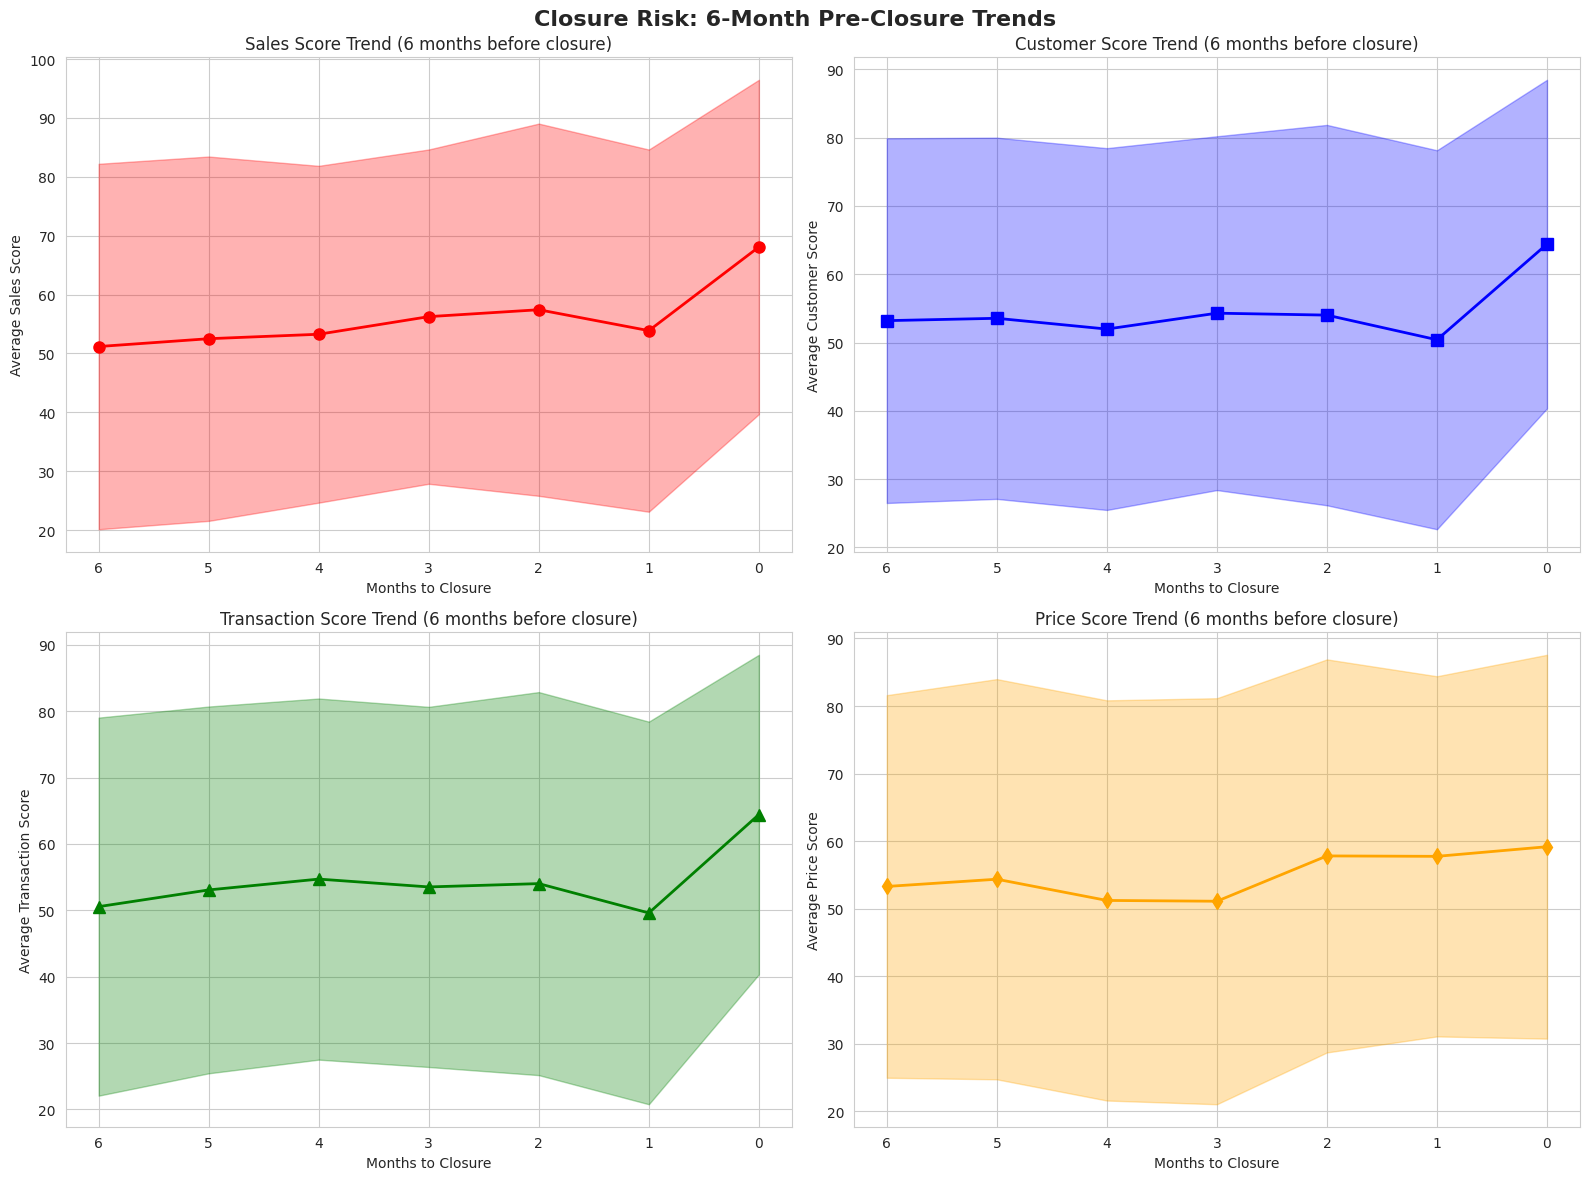

In [ ]:
# 3. 매출/고객 지표의 시계열 변화 패턴

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Closure Risk: 6-Month Pre-Closure Trends', fontsize=16, fontweight='bold')

# 매출 점수 변화
monthly_sales = pre_closure_data.groupby('MONTHS_TO_CLOSURE')['SALES_SCORE'].agg(['mean', 'std', 'count']).reset_index()
axes[0,0].plot(monthly_sales['MONTHS_TO_CLOSURE'], monthly_sales['mean'],
                marker='o', linewidth=2, markersize=8, color='red')
axes[0,0].fill_between(monthly_sales['MONTHS_TO_CLOSURE'],
                        monthly_sales['mean'] - monthly_sales['std'],
                        monthly_sales['mean'] + monthly_sales['std'],
                        alpha=0.3, color='red')
axes[0,0].set_title('Sales Score Trend (6 months before closure)')
axes[0,0].set_xlabel('Months to Closure')
axes[0,0].set_ylabel('Average Sales Score')
axes[0,0].invert_xaxis()

# 고객 수 점수 변화
monthly_customers = pre_closure_data.groupby('MONTHS_TO_CLOSURE')['CUSTOMER_SCORE'].agg(['mean', 'std']).reset_index()
axes[0,1].plot(monthly_customers['MONTHS_TO_CLOSURE'], monthly_customers['mean'],
                marker='s', linewidth=2, markersize=8, color='blue')
axes[0,1].fill_between(monthly_customers['MONTHS_TO_CLOSURE'],
                        monthly_customers['mean'] - monthly_customers['std'],
                        monthly_customers['mean'] + monthly_customers['std'],
                        alpha=0.3, color='blue')
axes[0,1].set_title('Customer Score Trend (6 months before closure)')
axes[0,1].set_xlabel('Months to Closure')
axes[0,1].set_ylabel('Average Customer Score')
axes[0,1].invert_xaxis()

# 거래건수 점수 변화
monthly_transactions = pre_closure_data.groupby('MONTHS_TO_CLOSURE')['TRANSACTION_SCORE'].agg(['mean', 'std']).reset_index()
axes[1,0].plot(monthly_transactions['MONTHS_TO_CLOSURE'], monthly_transactions['mean'],
                marker='^', linewidth=2, markersize=8, color='green')
axes[1,0].fill_between(monthly_transactions['MONTHS_TO_CLOSURE'],
                        monthly_transactions['mean'] - monthly_transactions['std'],
                        monthly_transactions['mean'] + monthly_transactions['std'],
                        alpha=0.3, color='green')
axes[1,0].set_title('Transaction Score Trend (6 months before closure)')
axes[1,0].set_xlabel('Months to Closure')
axes[1,0].set_ylabel('Average Transaction Score')
axes[1,0].invert_xaxis()

# 객단가 점수 변화
monthly_price = pre_closure_data.groupby('MONTHS_TO_CLOSURE')['PRICE_SCORE'].agg(['mean', 'std']).reset_index()
axes[1,1].plot(monthly_price['MONTHS_TO_CLOSURE'], monthly_price['mean'],
                marker='d', linewidth=2, markersize=8, color='orange')
axes[1,1].fill_between(monthly_price['MONTHS_TO_CLOSURE'],
                        monthly_price['mean'] - monthly_price['std'],
                        monthly_price['mean'] + monthly_price['std'],
                        alpha=0.3, color='orange')
axes[1,1].set_title('Price Score Trend (6 months before closure)')
axes[1,1].set_xlabel('Months to Closure')
axes[1,1].set_ylabel('Average Price Score')
axes[1,1].invert_xaxis()

plt.tight_layout()
plt.show()

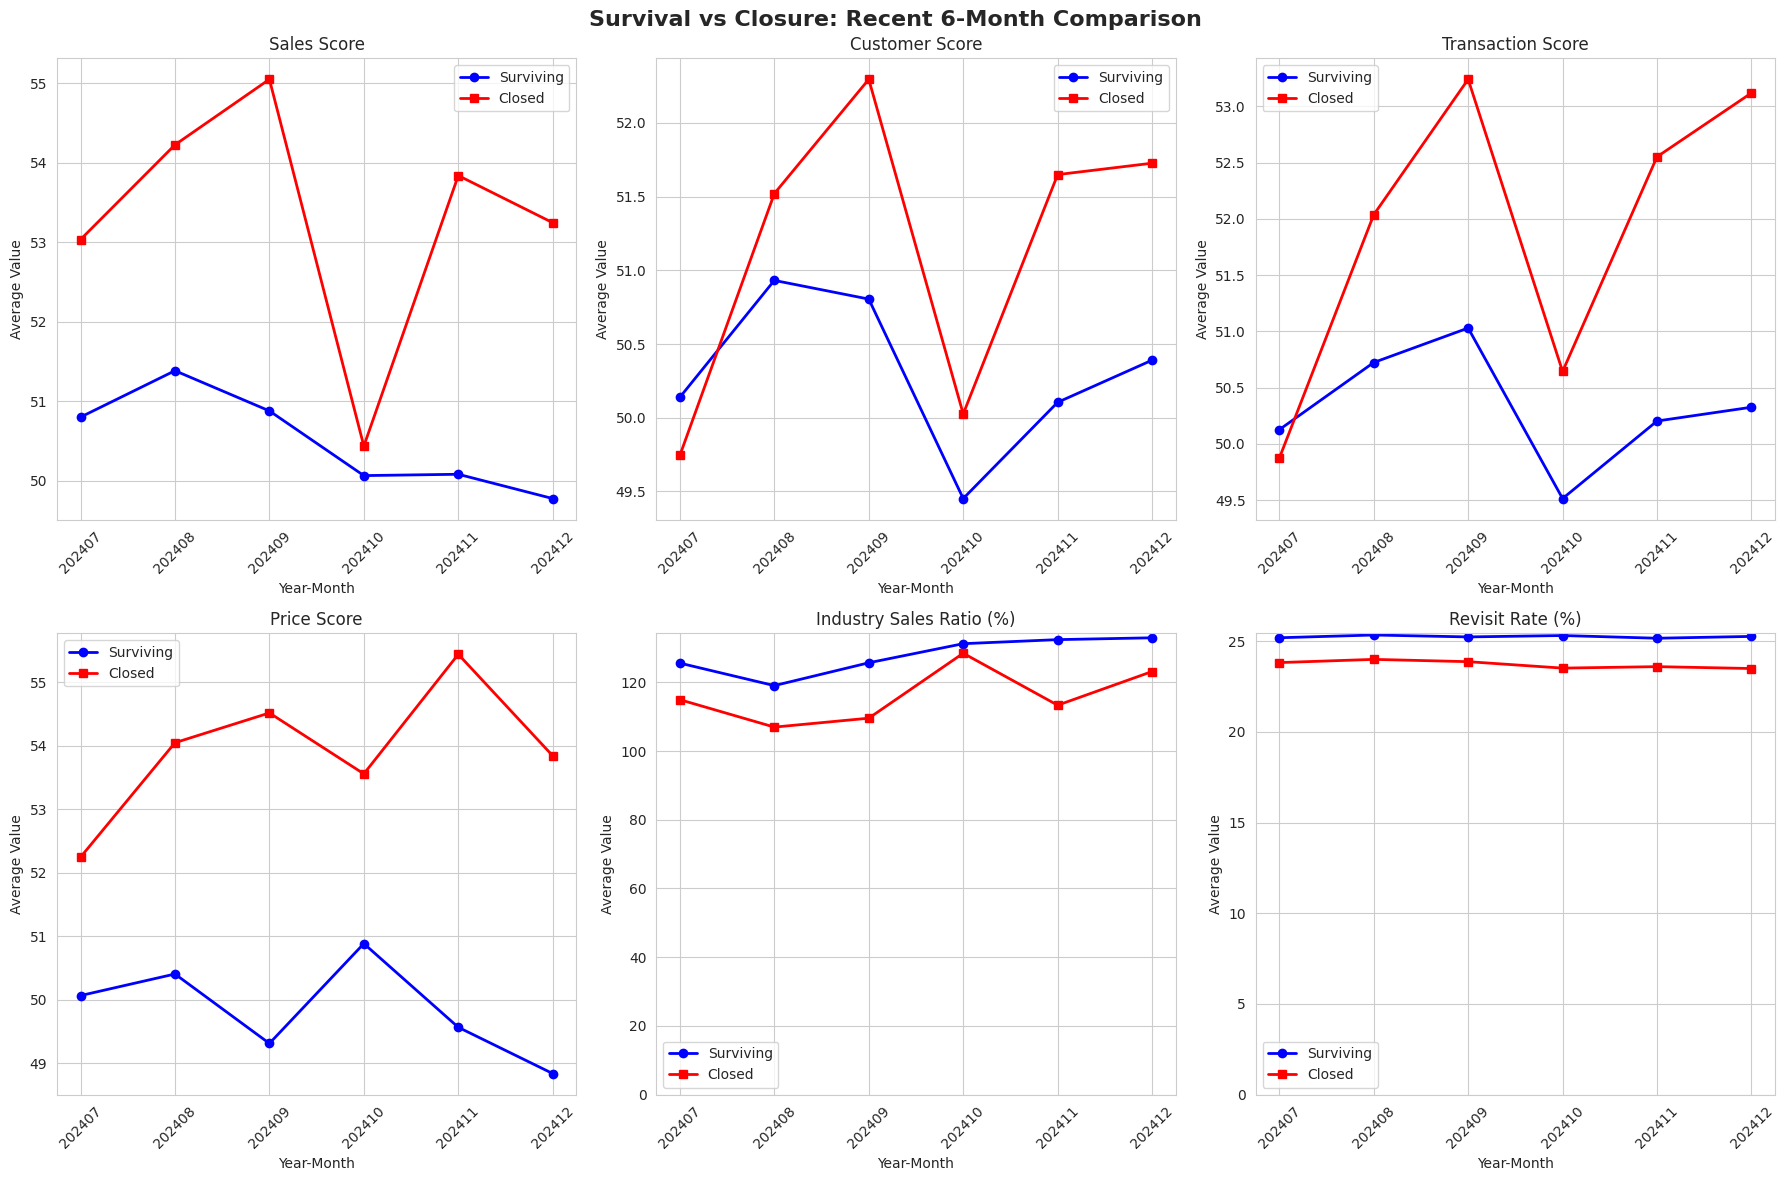

In [ ]:
# 4. 생존 vs 폐업 가맹점 비교 분석

# 최근 6개월 데이터로 제한 (202407~202412)
df['TA_YM'] = df['TA_YM'].astype(str)
recent_months = df[df['TA_YM'].isin(['202407','202408','202409','202410','202411','202412'])].copy()

# 생존/폐업 그룹별 월별 평균 계산
monthly_comparison = recent_months.groupby(['TA_YM', 'is_closed']).agg({
    'SALES_SCORE': 'mean',
    'CUSTOMER_SCORE': 'mean',
    'TRANSACTION_SCORE': 'mean',
    'PRICE_SCORE': 'mean',
    'M1_SME_RY_SAA_RAT': 'mean',  # 동일업종 대비 매출비율
    'MCT_UE_CLN_REU_RAT': 'mean'   # 재방문율
}).reset_index()

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Survival vs Closure: Recent 6-Month Comparison', fontsize=16, fontweight='bold')

metrics = [
    ('SALES_SCORE', 'Sales Score'),
    ('CUSTOMER_SCORE', 'Customer Score'),
    ('TRANSACTION_SCORE', 'Transaction Score'),
    ('PRICE_SCORE', 'Price Score'),
    ('M1_SME_RY_SAA_RAT', 'Industry Sales Ratio (%)'),
    ('MCT_UE_CLN_REU_RAT', 'Revisit Rate (%)')
]

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx//3, idx%3]

    # 생존 가맹점 (파란색)
    survival_data = monthly_comparison[monthly_comparison['is_closed'] == False]
    ax.plot(survival_data['TA_YM'], survival_data[metric],
            marker='o', linewidth=2, label='Surviving', color='blue', markersize=6)

    # 폐업 가맹점 (빨간색)
    closure_data = monthly_comparison[monthly_comparison['is_closed'] == True]
    if not closure_data.empty:
        ax.plot(closure_data['TA_YM'], closure_data[metric],
                marker='s', linewidth=2, label='Closed', color='red', markersize=6)

    ax.set_title(title)
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Average Value')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    # y축 범위 조정
    if metric in ['M1_SME_RY_SAA_RAT', 'MCT_UE_CLN_REU_RAT']:
        ax.set_ylim(0, None)

plt.tight_layout()
plt.show()


- 흐음...... 이상한데....

In [ ]:
# 5. 조기 경보 신호 탐지

# 가맹점별 시계열 데이터 준비
store_timeseries = df.groupby('ENCODED_MCT').apply(
    lambda x: x.sort_values('TA_YM')
).reset_index(drop=True)

warning_signals = []

for store_id in df['ENCODED_MCT'].unique():
    store_data = df[df['ENCODED_MCT'] == store_id].sort_values('TA_YM').copy()

    if len(store_data) < 3:  # 최소 3개월 데이터 필요
        continue

    # 연속 하락 패턴 탐지
    sales_decline = 0
    customer_decline = 0

    for i in range(1, len(store_data)):
        # 매출 점수 하락
        if store_data.iloc[i]['SALES_SCORE'] < store_data.iloc[i-1]['SALES_SCORE']:
            sales_decline += 1
        else:
            sales_decline = 0

        # 고객 점수 하락
        if store_data.iloc[i]['CUSTOMER_SCORE'] < store_data.iloc[i-1]['CUSTOMER_SCORE']:
            customer_decline += 1
        else:
            customer_decline = 0

    # 경고 신호 기준: 연속 2개월 이상 하락
    is_closed = store_data['is_closed'].iloc[0]

    warning_signals.append({
        'ENCODED_MCT': store_id,
        'SALES_CONSECUTIVE_DECLINE': sales_decline,
        'CUSTOMER_CONSECUTIVE_DECLINE': customer_decline,
        'is_closed': is_closed,
        'LATEST_SALES_SCORE': store_data.iloc[-1]['SALES_SCORE'],
        'LATEST_CUSTOMER_SCORE': store_data.iloc[-1]['CUSTOMER_SCORE'],
        'MONTHS_OF_DATA': len(store_data)
    })

warning_df = pd.DataFrame(warning_signals)

# 경고 신호별 폐업률 분석
print("=== Early Warning Signal Analysis ===")
print("\n1. Sales Score Consecutive Decline:")
sales_warning = warning_df.groupby('SALES_CONSECUTIVE_DECLINE')['is_closed'].agg(['count', 'sum', 'mean']).reset_index()
sales_warning['CLOSURE_RATE'] = sales_warning['mean'] * 100
print(sales_warning)

print("\n2. Customer Score Consecutive Decline:")
customer_warning = warning_df.groupby('CUSTOMER_CONSECUTIVE_DECLINE')['is_closed'].agg(['count', 'sum', 'mean']).reset_index()
customer_warning['CLOSURE_RATE'] = customer_warning['mean'] * 100
print(customer_warning)

# 고위험 가맹점 식별
high_risk_stores = warning_df[
    (warning_df['SALES_CONSECUTIVE_DECLINE'] >= 2) |
    (warning_df['CUSTOMER_CONSECUTIVE_DECLINE'] >= 2)
].copy()

print(f"\n3. High Risk Stores (consecutive decline >= 2 months): {len(high_risk_stores)}")
print(f"   - Closure rate among high-risk stores: {high_risk_stores['is_closed'].mean()*100:.1f}%")


/tmp/ipython-input-758982578.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_timeseries = df.groupby('ENCODED_MCT').apply(


=== Early Warning Signal Analysis ===

1. Sales Score Consecutive Decline:
   SALES_CONSECUTIVE_DECLINE  count  sum      mean  CLOSURE_RATE
0                          0   3531  108  0.030586      3.058624
1                          1    542   14  0.025830      2.583026
2                          2     38    0  0.000000      0.000000
3                          3      2    1  0.500000     50.000000

2. Customer Score Consecutive Decline:
   CUSTOMER_CONSECUTIVE_DECLINE  count  sum      mean  CLOSURE_RATE
0                             0   3783  113  0.029870      2.987047
1                             1    319   10  0.031348      3.134796
2                             2     11    0  0.000000      0.000000

3. High Risk Stores (consecutive decline >= 2 months): 42
   - Closure rate among high-risk stores: 2.4%


In [ ]:
df.columns

Index(['ENCODED_MCT', 'MCT_BSE_AR', 'MCT_NM', 'MCT_BRD_NUM', 'HPSN_MCT_ZCD_NM',
       'HPSN_MCT_BZN_CD_NM', 'ARE_D', 'MCT_ME_D', 'TA_YM', 'MCT_OPE_MS_CN',
       'RC_M1_SAA', 'RC_M1_TO_UE_CT', 'RC_M1_UE_CUS_CN', 'RC_M1_AV_NP_AT',
       'APV_CE_RAT', 'DLV_SAA_RAT', 'M1_SME_RY_SAA_RAT', 'M1_SME_RY_CNT_RAT',
       'M12_SME_RY_SAA_PCE_RT', 'M12_SME_BZN_SAA_PCE_RT',
       'M12_SME_RY_ME_MCT_RAT', 'M12_SME_BZN_ME_MCT_RAT', 'M12_MAL_1020_RAT',
       'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
       'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT',
       'M12_FME_50_RAT', 'M12_FME_60_RAT', 'MCT_UE_CLN_REU_RAT',
       'MCT_UE_CLN_NEW_RAT', 'RC_M1_SHC_RSD_UE_CLN_RAT',
       'RC_M1_SHC_WP_UE_CLN_RAT', 'RC_M1_SHC_FLP_UE_CLN_RAT', 'is_closed',
       'start', 'end', 'year', 'month', 'YM', 'operating_months',
       'RC_M1_SAA_numeric', 'RC_M1_UE_CUS_CN_numeric', 'revenue_per_customer',
       'RC_M1_SAA_num', 'season', 'revenue_score', 'young_ratio',
     

In [ ]:
import pandas as pd
import numpy as np

# 데이터 정렬
df = df.sort_values(['ENCODED_MCT', 'TA_YM'])

# 이전 3개월치 데이터를 feature로 추가
window_size = 3
feature_cols = ['MCT_OPE_MS_CN',
       'RC_M1_SAA', 'RC_M1_TO_UE_CT', 'RC_M1_UE_CUS_CN', 'RC_M1_AV_NP_AT',
       'APV_CE_RAT', 'DLV_SAA_RAT', 'M1_SME_RY_SAA_RAT', 'M1_SME_RY_CNT_RAT',
       'M12_SME_RY_SAA_PCE_RT', 'M12_SME_BZN_SAA_PCE_RT',
       'M12_SME_RY_ME_MCT_RAT', 'M12_SME_BZN_ME_MCT_RAT', 'M12_MAL_1020_RAT',
       'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
       'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT',
       'M12_FME_50_RAT', 'M12_FME_60_RAT', 'MCT_UE_CLN_REU_RAT',
       'MCT_UE_CLN_NEW_RAT', 'RC_M1_SHC_RSD_UE_CLN_RAT',
       'RC_M1_SHC_WP_UE_CLN_RAT', 'RC_M1_SHC_FLP_UE_CLN_RAT']

all_rows = []

for store_id, store_data in df.groupby('ENCODED_MCT'):
    store_data = store_data.reset_index(drop=True)
    for idx in range(len(store_data)):
        if idx < window_size:
            # 이전 3개월 데이터가 부족하면 넘어감
            continue
        row = {'ENCODED_MCT': store_id, 'TA_YM': store_data.loc[idx, 'TA_YM']}
        # 이전 3개월 feature
        for i in range(1, window_size+1):
            for col in feature_cols:
                row[f'{col}_m-{i}'] = store_data.loc[idx-i, col]
        # 타겟: 현재 월 이후 폐업 여부
        row['is_closed_next'] = store_data.loc[idx, 'is_closed']
        all_rows.append(row)

sliding_df = pd.DataFrame(all_rows)

print(sliding_df.shape)
sliding_df.head()


(74133, 87)


,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN_m-1,RC_M1_SAA_m-1,RC_M1_TO_UE_CT_m-1,RC_M1_UE_CUS_CN_m-1,RC_M1_AV_NP_AT_m-1,APV_CE_RAT_m-1,DLV_SAA_RAT_m-1,M1_SME_RY_SAA_RAT_m-1,...,M12_FME_30_RAT_m-3,M12_FME_40_RAT_m-3,M12_FME_50_RAT_m-3,M12_FME_60_RAT_m-3,MCT_UE_CLN_REU_RAT_m-3,MCT_UE_CLN_NEW_RAT_m-3,RC_M1_SHC_RSD_UE_CLN_RAT_m-3,RC_M1_SHC_WP_UE_CLN_RAT_m-3,RC_M1_SHC_FLP_UE_CLN_RAT_m-3,is_closed_next
0,000F03E44A,202304,5_75-90%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,NaN,0.0,...,0.0000,0.0,100.0000,0.0,0.0,100.00,0.0,0.0,100.0,False
1,000F03E44A,202305,5_75-90%,6_90%초과(하위 10% 이하),5_75-90%,5_75-90%,3_25-50%,1_상위1구간,NaN,1.3,...,0.0000,0.0,100.0000,0.0,0.0,0.00,NaN,NaN,NaN,False
2,000F03E44A,202306,5_75-90%,6_90%초과(하위 10% 이하),5_75-90%,5_75-90%,6_90%초과(하위 10% 이하),1_상위1구간,NaN,0.0,...,0.0000,0.0,100.0000,0.0,0.0,0.00,NaN,NaN,NaN,False
3,000F03E44A,202307,5_75-90%,6_90%초과(하위 10% 이하),5_75-90%,5_75-90%,6_90%초과(하위 10% 이하),1_상위1구간,NaN,0.1,...,14.0000,0.0,14.0000,0.0,0.0,50.00,0.0,100.0,0.0,False
4,000F03E44A,202308,5_75-90%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,NaN,0.0,...,19.5431,0.0,9.7569,0.0,0.0,33.33,0.0,0.0,100.0,False


In [ ]:
sliding_df[sliding_df['is_closed_next']==True]

,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN_m-1,RC_M1_SAA_m-1,RC_M1_TO_UE_CT_m-1,RC_M1_UE_CUS_CN_m-1,RC_M1_AV_NP_AT_m-1,APV_CE_RAT_m-1,DLV_SAA_RAT_m-1,M1_SME_RY_SAA_RAT_m-1,...,M12_FME_30_RAT_m-3,M12_FME_40_RAT_m-3,M12_FME_50_RAT_m-3,M12_FME_60_RAT_m-3,MCT_UE_CLN_REU_RAT_m-3,MCT_UE_CLN_NEW_RAT_m-3,RC_M1_SHC_RSD_UE_CLN_RAT_m-3,RC_M1_SHC_WP_UE_CLN_RAT_m-3,RC_M1_SHC_FLP_UE_CLN_RAT_m-3,is_closed_next
1468,04393D7C92,202304,4_50-75%,4_50-75%,4_50-75%,4_50-75%,3_25-50%,1_상위1구간,32.9,52.2,...,12.9402,8.8638,11.6604,1.8960,20.45,3.72,50.0,10.0,40.0,True
1469,04393D7C92,202305,4_50-75%,5_75-90%,4_50-75%,4_50-75%,3_25-50%,1_상위1구간,44.4,32.5,...,13.4992,9.0152,11.0920,2.0296,20.00,4.44,55.6,5.6,38.9,True
1470,04393D7C92,202306,4_50-75%,4_50-75%,4_50-75%,4_50-75%,3_25-50%,6_상위6구간(하위1구간),20.9,50.1,...,13.8768,8.6376,11.4696,2.0768,20.15,6.46,63.0,11.1,25.9,True
1471,04393D7C92,202307,4_50-75%,4_50-75%,4_50-75%,4_50-75%,3_25-50%,1_상위1구간,25.2,55.5,...,14.4704,8.7108,11.6144,2.1896,20.08,4.72,77.8,0.0,22.2,True
1472,04393D7C92,202308,3_25-50%,4_50-75%,4_50-75%,4_50-75%,3_25-50%,1_상위1구간,43.6,55.4,...,14.3264,9.5832,11.7612,2.5652,18.55,5.65,50.0,20.0,30.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72880,FCAF2BC53E,202408,2_10-25%,3_25-50%,1_10%이하,1_10%이하,5_75-90%,2_상위2구간,10.6,186.6,...,7.9124,5.2400,5.5020,1.3100,31.79,8.91,35.9,6.5,57.6,True
72881,FCAF2BC53E,202409,2_10-25%,3_25-50%,1_10%이하,1_10%이하,5_75-90%,1_상위1구간,9.5,202.4,...,8.1220,5.1352,5.5020,1.4148,30.71,8.55,36.5,4.7,58.8,True
72882,FCAF2BC53E,202410,2_10-25%,2_10-25%,1_10%이하,1_10%이하,5_75-90%,2_상위2구간,6.1,240.0,...,8.0325,5.0400,5.6175,1.4700,30.96,5.52,41.2,6.8,52.0,True
72883,FCAF2BC53E,202411,2_10-25%,2_10-25%,1_10%이하,1_10%이하,5_75-90%,1_상위1구간,10.8,275.2,...,8.0850,5.0400,5.8275,1.4700,30.90,6.39,41.4,7.4,51.2,True
